**Nama : Arya Surya Prasetya**<br>
**NIM : 211351030**<br>
**Kelas : IF PAGI A**<br>

#Import Dataset Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aryasuryaprasetya","key":"99cbeab8400d7a0a97c0220df6f9c909"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d shwetabh123/mall-customers

  0% 0.00/1.56k [00:00<?, ?B/s]
100% 1.56k/1.56k [00:00<00:00, 3.74MB/s]


In [ ]:
!unzip mall-customers.zip -d mall
!ls mall

Archive:  mall-customers.zip
  inflating: mall/Mall_Customers.csv  
Mall_Customers.csv


#Import Library

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#Data Discovery

In [ ]:
df = pd.read_csv('/content/mall/Mall_Customers.csv')
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
X = df.iloc[:,:-1].values

y = df.iloc[:,-1].values

In [ ]:
df.head().style.background_gradient(cmap =sns.cubehelix_palette(as_cmap=True))

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.sample()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
89,90,Female,50,58,46


#EDA

<Figure size 1200x600 with 0 Axes>

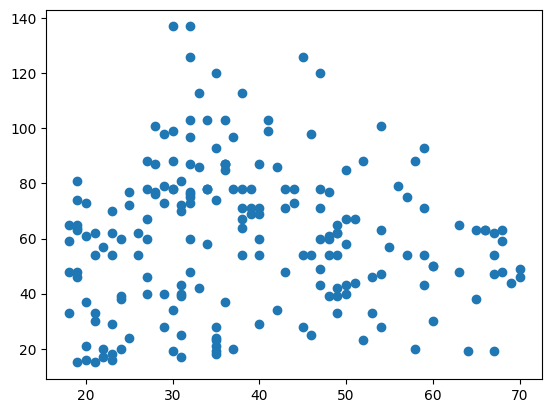

<Figure size 1200x600 with 0 Axes>

In [ ]:
plt.scatter(df['Age'],df['Annual Income (k$)'])
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

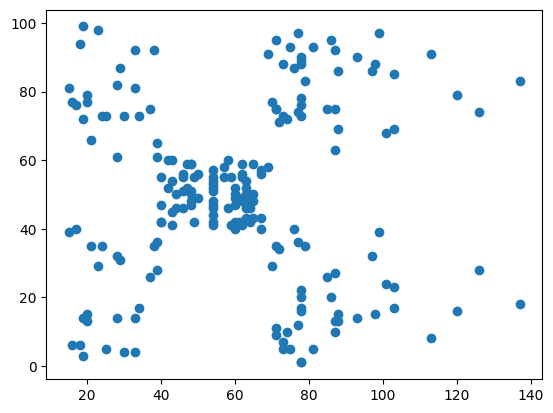

<Figure size 1200x600 with 0 Axes>

In [ ]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.figure(figsize=(12,6))

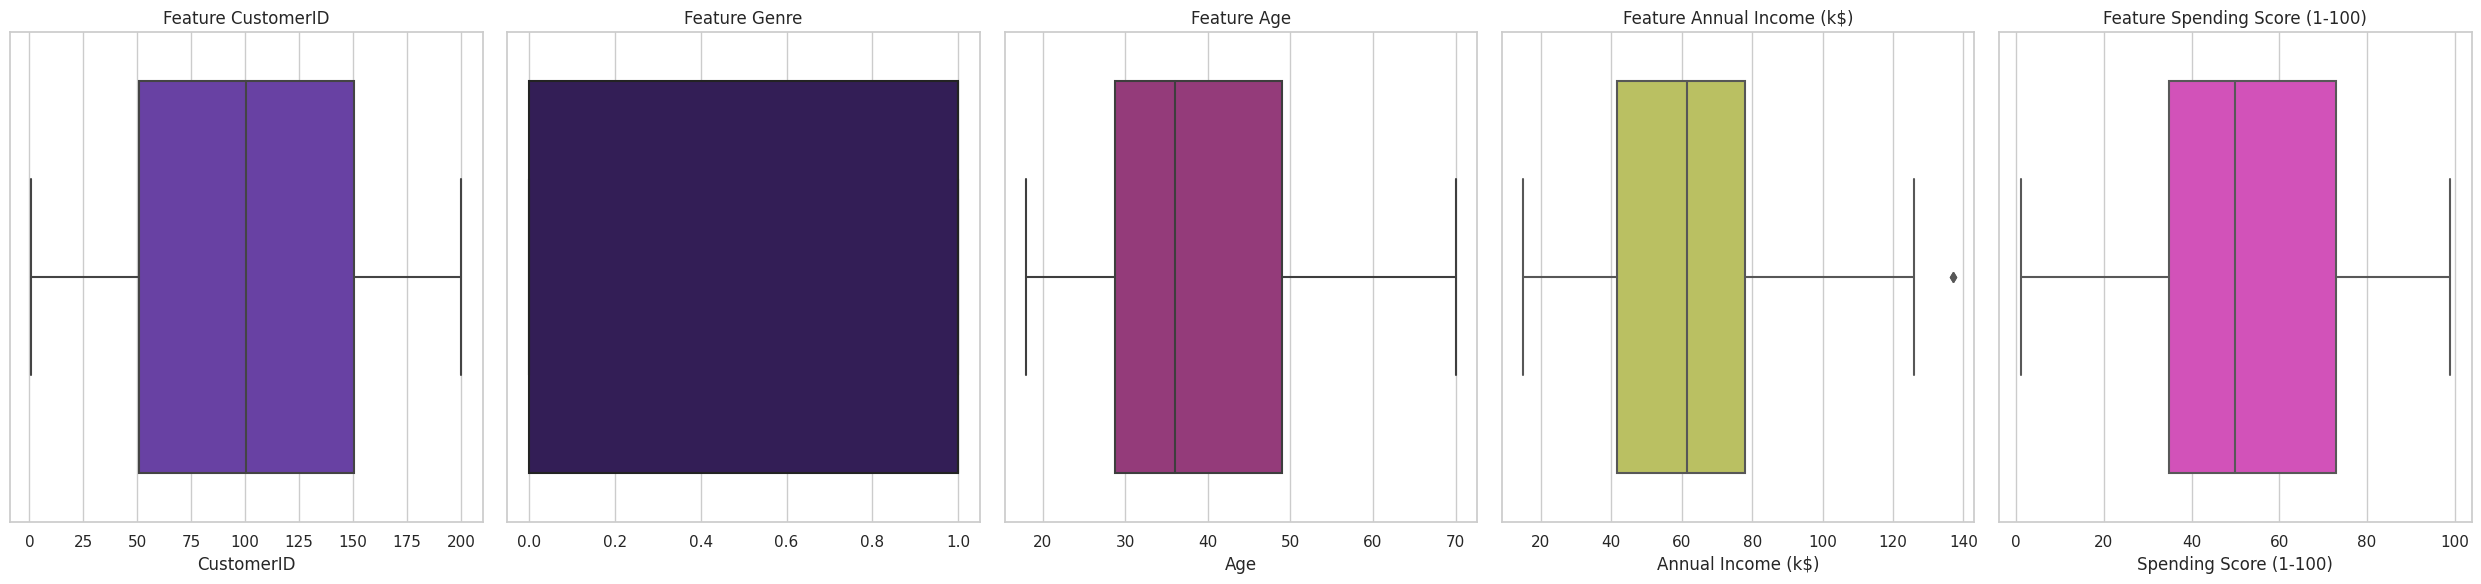

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(25, 6))
axes = axes.flatten()
sns.set(style='whitegrid')
for i, feature in enumerate(df.columns):
    if pd.api.types.is_numeric_dtype(df[feature]):
        x_data = df[feature]
    else:
        x_data = pd.factorize(df[feature])[0]

    sns.boxplot(x=x_data, ax=axes[i], color=np.random.rand(3,))
    axes[i].set_title(f'Feature {feature}')

plt.tight_layout()
plt.show()

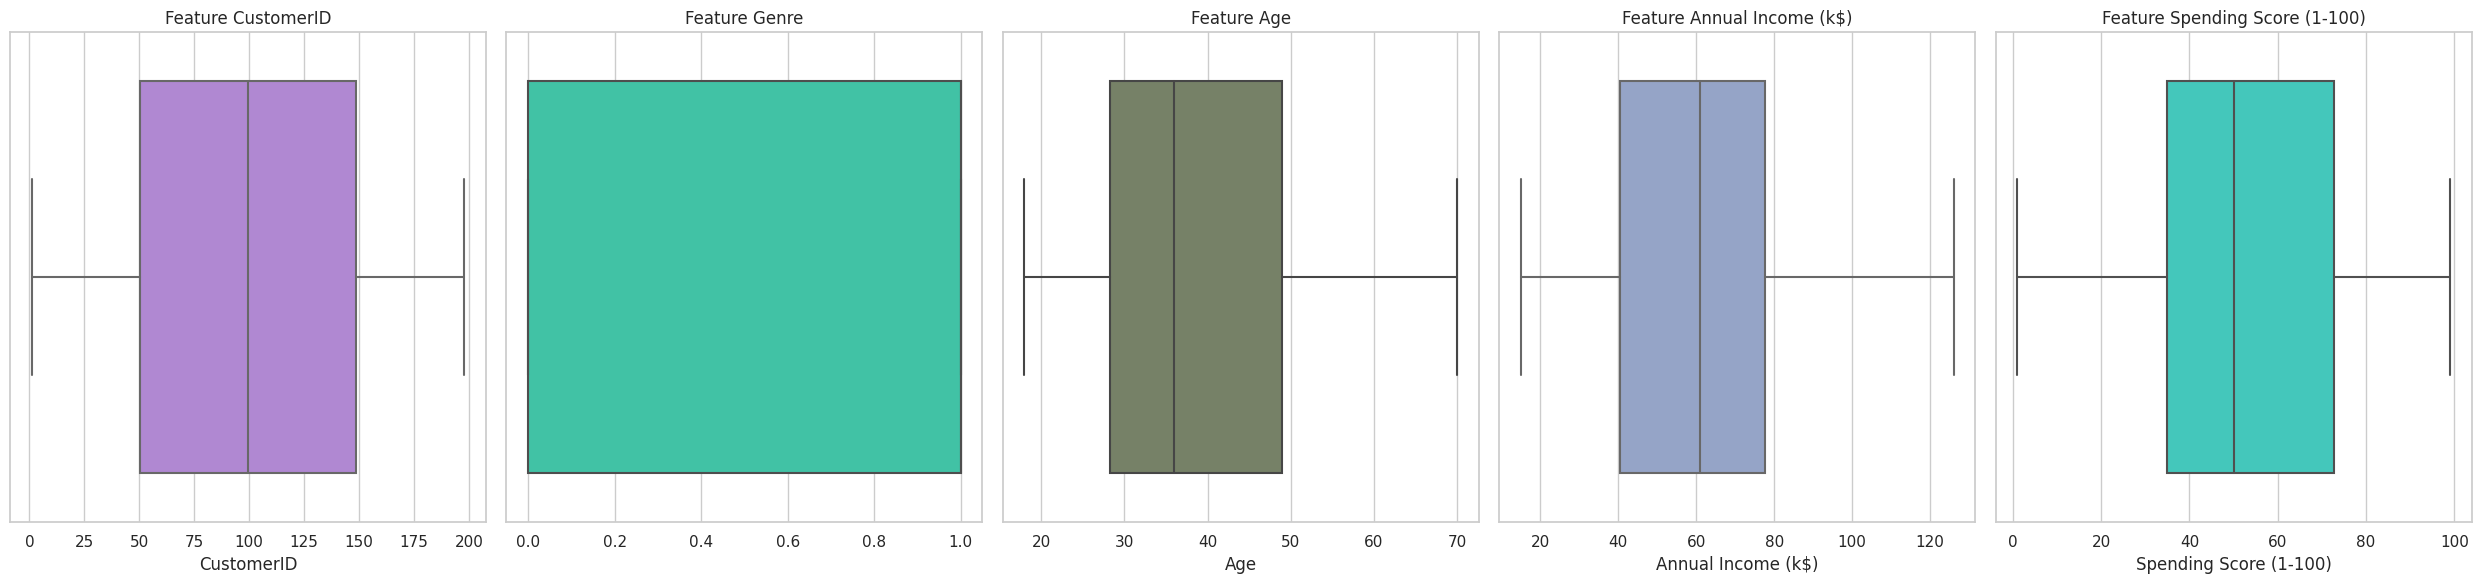

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(25, 6))
axes = axes.flatten()
sns.set(style='whitegrid')
for i, feature in enumerate(df.columns):
    if pd.api.types.is_numeric_dtype(df[feature]):
        x_data = df[feature]
    else:
        x_data = pd.factorize(df[feature])[0]

    sns.boxplot(x=x_data, ax=axes[i], color=np.random.rand(3,))
    axes[i].set_title(f'Feature {feature}')

plt.tight_layout()
plt.show()

Cost_Function= 256064.409090909 with 1 Clusters
Cost_Function= 171040.63963133638 with 2 Clusters
Cost_Function= 101166.23927650377 with 3 Clusters
Cost_Function= 68497.6552538809 with 4 Clusters
Cost_Function= 39345.27707732771 with 5 Clusters
Cost_Function= 33830.09038456356 with 6 Clusters
Cost_Function= 28348.038504864315 with 7 Clusters
Cost_Function= 23259.080375180383 with 8 Clusters
Cost_Function= 20067.440343635695 with 9 Clusters
Cost_Function= 17966.36732776268 with 10 Clusters


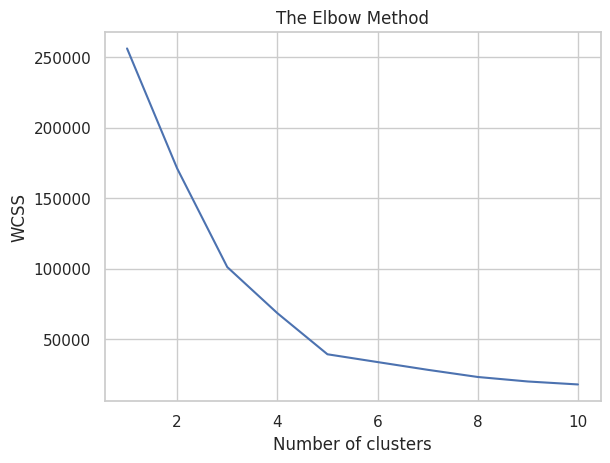

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init=100)
    kmeans.fit(X)
    print('Cost_Function=',kmeans.inertia_,'with', i, 'Clusters')
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Data Preparation

In [ ]:
numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [ ]:
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outliers = ((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)

In [ ]:
df = df[~outliers]

In [ ]:
X = df.iloc[:, 3:].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Modelling

In [ ]:
sse = []
for i in range(1,9):
    kmeans = KMeans(n_clusters=i , max_iter=300)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

fig = px.line(y=sse,template="seaborn",title='Eblow Method')
fig.update_layout(width=800, height=600,
title_font_color="#BF40BF",
xaxis=dict(color="#BF40BF",title="Clusters"),
yaxis=dict(color="#BF40BF",title="SSE"))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

#Visualisasi Hasil Modelling

In [ ]:
kmeans = KMeans(n_clusters=5,init = 'k-means++', n_init=100, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

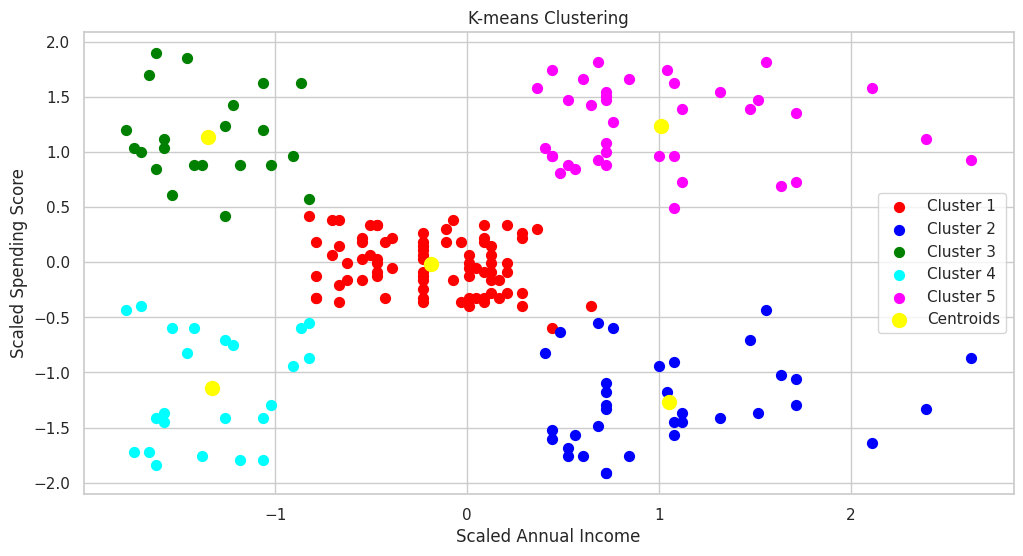

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(X[kmeans_labels == 0, 0], X[kmeans_labels == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[kmeans_labels == 1, 0], X[kmeans_labels == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[kmeans_labels == 2, 0], X[kmeans_labels == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X[kmeans_labels == 3, 0], X[kmeans_labels == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(X[kmeans_labels == 4, 0], X[kmeans_labels == 4, 1], s=50, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.legend()
plt.show()

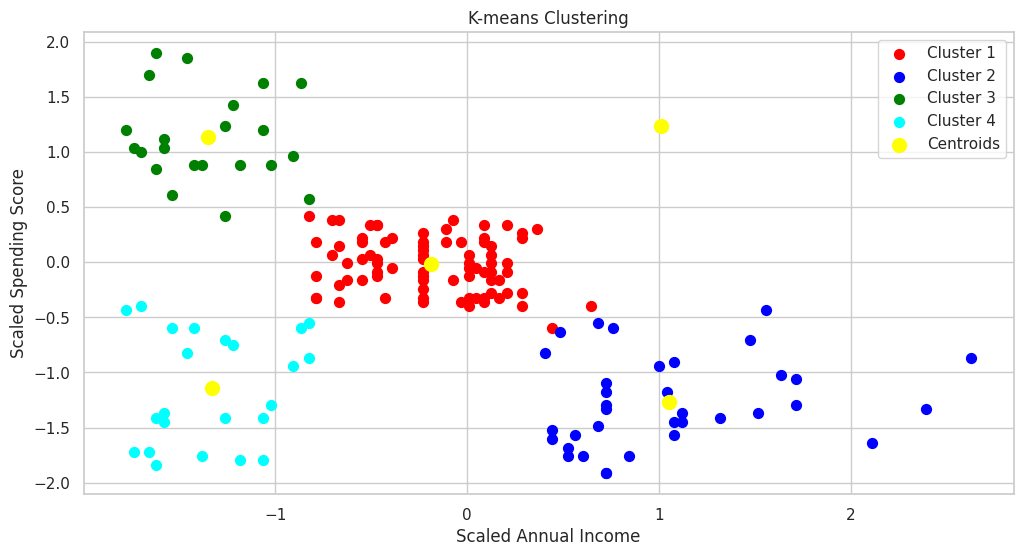

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(X[kmeans_labels == 0, 0], X[kmeans_labels == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[kmeans_labels == 1, 0], X[kmeans_labels == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[kmeans_labels == 2, 0], X[kmeans_labels == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X[kmeans_labels == 3, 0], X[kmeans_labels == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.legend()
plt.show()

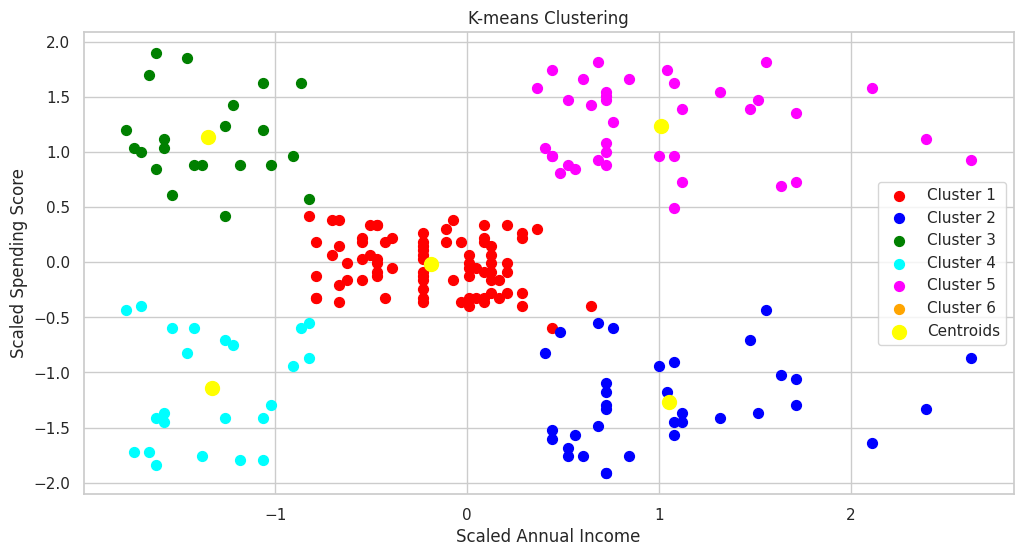

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(X[kmeans_labels == 0, 0], X[kmeans_labels == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[kmeans_labels == 1, 0], X[kmeans_labels == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[kmeans_labels == 2, 0], X[kmeans_labels == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X[kmeans_labels == 3, 0], X[kmeans_labels == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(X[kmeans_labels == 4, 0], X[kmeans_labels == 4, 1], s=50, c='magenta', label='Cluster 5')
plt.scatter(X[kmeans_labels == 5, 0], X[kmeans_labels == 5, 1], s=50, c='orange', label='Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.legend()
plt.show()